# Iris Classification

In [1]:
#importing modules
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading Dataset

In [2]:
data=datasets.load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Creating a Pandas Dataframe

In [5]:
iris_df=pd.DataFrame(data["data"],columns=data["feature_names"])

In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris_df["target"]=data["target"]

In [8]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Basic Descriptive Statistics

In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Distribution of features and target

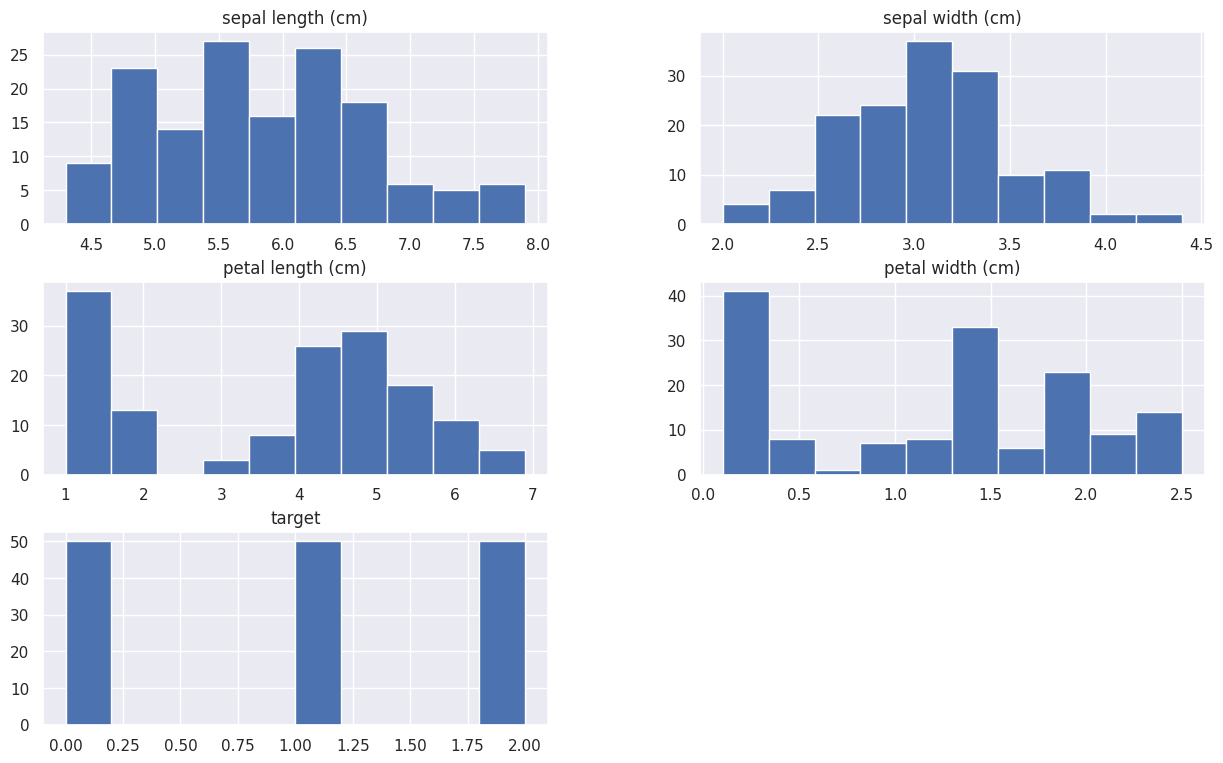

In [11]:
iris_df.hist(figsize=(15,9))
plt.show()

## Relationship of the Data Features with the Target

In [12]:
iris_df["target_names"]=iris_df["target"].map({0:'setosa',1: 'versicolor',2: 'virginica'})

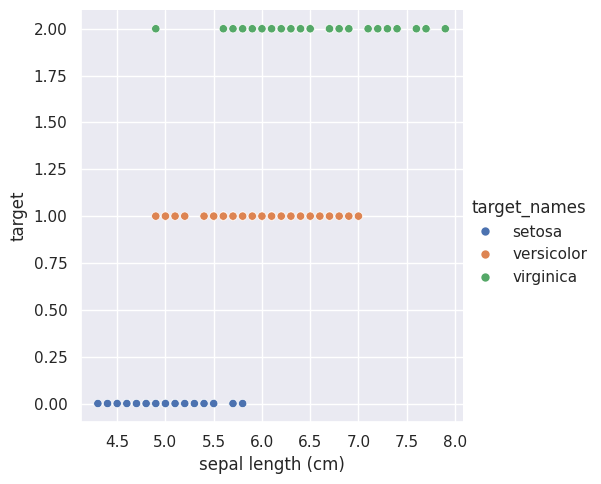

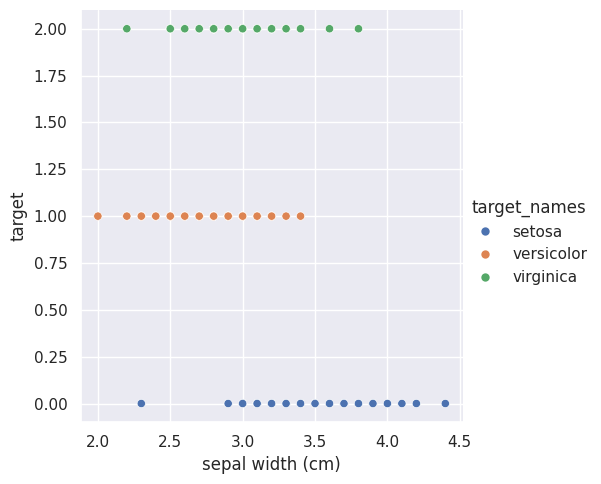

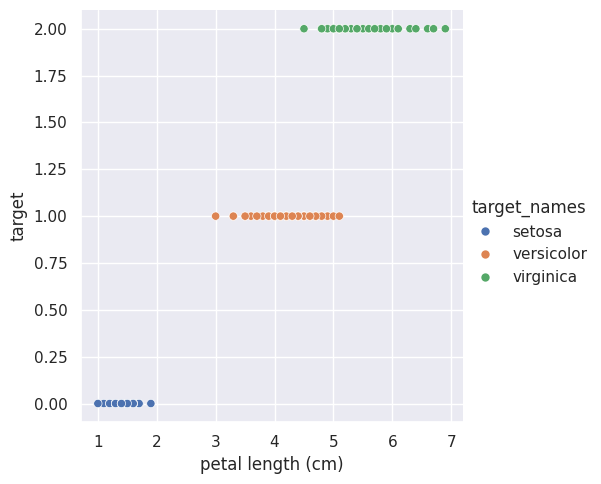

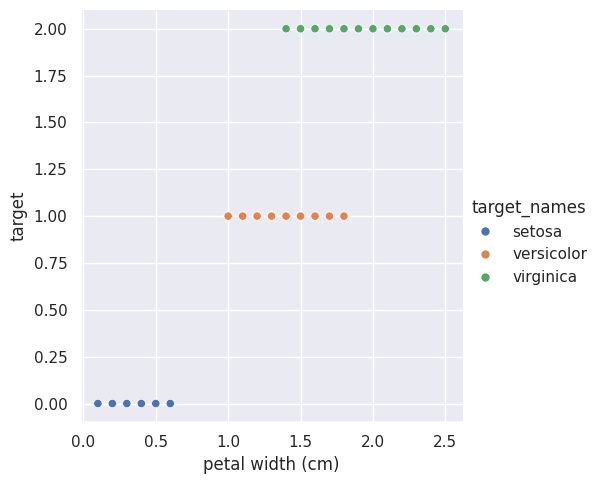

In [13]:
sns.relplot(x="sepal length (cm)",y="target",hue="target_names",data=iris_df)
plt.show()
sns.relplot(x="sepal width (cm)",y="target",hue="target_names",data=iris_df)
plt.show()
sns.relplot(x="petal length (cm)",y="target",hue="target_names",data=iris_df)
plt.show()
sns.relplot(x="petal width (cm)",y="target",hue="target_names",data=iris_df)
plt.show()

In [14]:
sns.pairplot(iris_df,hue="target_names")

## Train Test Split

In [15]:
df_train,df_test=train_test_split(iris_df)

In [16]:
print(df_train.shape,df_test.shape)

(112, 6) (38, 6)


In [17]:
x_train=df_train.drop(columns=["target","target_names"]).values
y_train=df_train["target"].values

## Modeling

In [18]:
model=LogisticRegression(max_iter=200)

In [19]:
xt,xv,yt,yv=train_test_split(x_train,y_train)

In [20]:
model.fit(xt,yt)

LogisticRegression(max_iter=200)

In [21]:
model.score(xv,yv)

0.9642857142857143

## Using Cross Validation

In [22]:
accuracies=cross_val_score(model,x_train,y_train,cv=5,scoring="accuracy")
np.mean(accuracies)

0.9731225296442687

## Testing Model Against Test Data

In [23]:
x_test=df_test.drop(columns=["target","target_names"]).values
y_test=df_test["target"].values

In [24]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [26]:
score=model.score(x_test,y_test)
print(f"Iris Classification accuracy {score*100:.2f}%")

Iris Classification accuracy 97.37%
